# Network Science (HS21)
## Assignment 5

### Ben     Murphy          16-714-925
### Florian Rüegsegger      14-714-737

#### The excercise was solved together in person



## A05.1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite.gml import read_gml
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.smallworld import random_reference
from scipy.special import factorial
from typing import Dict,Tuple,List
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

In [2]:
def degree_distribution(graph: nx.Graph) -> Tuple[np.array,np.array]:
    degrees = sorted([d for n,d in graph.degree()], reverse=True)
    degrees, counts = np.unique(degrees, return_counts=True)
    return degrees, counts

def average_degree(graph: nx.Graph) -> float:
    return sum(dict(graph.degree()).values()) / graph.number_of_nodes()


def plot_degree_distribution(degrees: List, counts: List,label: str):
    plt.plot(degrees,counts, label=label)
    plt.title("degree distribution")
    plt.xlabel("degree")
    plt.ylabel("Counts")
    plt.legend()

def poission_distribution(mean, degree):
    return np.power(mean, degree) / factorial(degree) * np.exp(-mean)

def exponential_distribution(mean, degree):
    return mean**-1 * np.exp(-degree / mean) 

def s01(graph: nx.Graph, name: str):
    degrees, counts = degree_distribution(graph)
    plot_degree_distribution(degrees, counts,name)
    plt.show()

In [3]:
graph = read_gml("data/graph_escort.gml")

In [4]:
degrees, counts = degree_distribution(graph)
k = np.asarray([d for d in dict(graph.degree()).values()])
spacing = np.linspace(min(k),max(k),len(k))
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


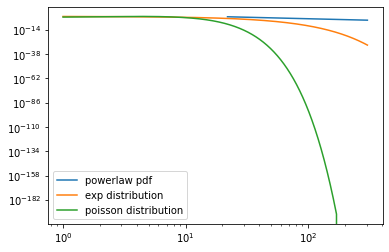

In [5]:
fit.power_law.plot_pdf(label="powerlaw pdf")
#powerlaw.plot_pdf(k,marker='o', label="k pdf")
plt.plot(spacing,exponential_distribution(average_degree(graph),spacing), label="exp distribution")
plt.plot(spacing, poission_distribution(average_degree(graph), spacing), label="poisson distribution")
plt.legend()
plt.show()

In [14]:
graph = read_gml("data/graph_amazon.gml")

In [15]:
degrees, counts = degree_distribution(graph)
k = np.asarray([d for d in dict(graph.degree()).values()])
spacing = np.linspace(min(k),max(k),len(k))
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


C:\Users\benmu\AppData\Local\Temp/ipykernel_32/3250741166.py:18: RuntimeWarning: overflow encountered in power
  return np.power(mean, degree) / factorial(degree) * np.exp(-mean)
C:\Users\benmu\AppData\Local\Temp/ipykernel_32/3250741166.py:18: RuntimeWarning: invalid value encountered in true_divide
  return np.power(mean, degree) / factorial(degree) * np.exp(-mean)


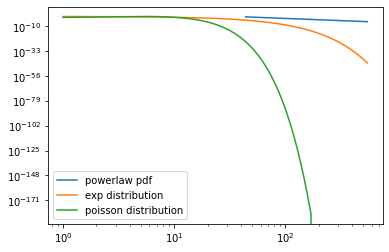

In [16]:
fit.power_law.plot_pdf(label="powerlaw pdf")
#powerlaw.plot_pdf(k,marker='o', label="k pdf")
plt.plot(spacing,exponential_distribution(average_degree(graph),spacing), label="exp distribution")
plt.plot(spacing, poission_distribution(average_degree(graph), spacing), label="poisson distribution")
plt.legend()
plt.show()

In [17]:
graph = read_gml("data/graph_actors.gml")

In [18]:
degrees, counts = degree_distribution(graph)
k = np.asarray([d for d in dict(graph.degree()).values()])
spacing = np.linspace(min(k),max(k),len(k))
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


C:\Users\benmu\AppData\Local\Temp/ipykernel_32/3250741166.py:18: RuntimeWarning: overflow encountered in power
  return np.power(mean, degree) / factorial(degree) * np.exp(-mean)
C:\Users\benmu\AppData\Local\Temp/ipykernel_32/3250741166.py:18: RuntimeWarning: invalid value encountered in true_divide
  return np.power(mean, degree) / factorial(degree) * np.exp(-mean)


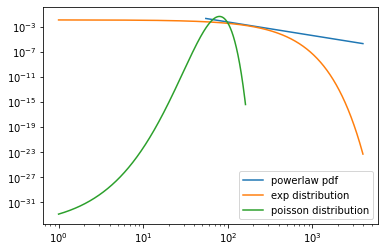

In [19]:
fit.power_law.plot_pdf(label="powerlaw pdf")
#powerlaw.plot_pdf(k,marker='o', label="k pdf")
plt.plot(spacing,exponential_distribution(average_degree(graph),spacing), label="exp distribution")
plt.plot(spacing, poission_distribution(average_degree(graph), spacing), label="poisson distribution")
plt.legend()
plt.show()

In [20]:
graph = read_gml("data/graph_internet.gml")

In [21]:
degrees, counts = degree_distribution(graph)
k = np.asarray([d for d in dict(graph.degree()).values()])
spacing = np.linspace(min(k),max(k),len(k))
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


C:\Users\benmu\AppData\Local\Temp/ipykernel_32/3250741166.py:18: RuntimeWarning: overflow encountered in power
  return np.power(mean, degree) / factorial(degree) * np.exp(-mean)
C:\Users\benmu\AppData\Local\Temp/ipykernel_32/3250741166.py:18: RuntimeWarning: invalid value encountered in true_divide
  return np.power(mean, degree) / factorial(degree) * np.exp(-mean)


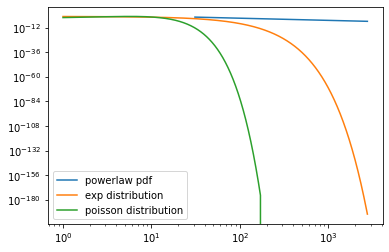

In [22]:
fit.power_law.plot_pdf(label="powerlaw pdf")
#powerlaw.plot_pdf(k,marker='o', label="k pdf")
plt.plot(spacing,exponential_distribution(average_degree(graph),spacing), label="exp distribution")
plt.plot(spacing, poission_distribution(average_degree(graph), spacing), label="poisson distribution")
plt.legend()
plt.show()

# A05.2

In [6]:
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.algorithms.assortativity import degree_pearson_correlation_coefficient

In [7]:
def get_data(graph):
    data = {}
    data["acc"] = nx.average_clustering(graph)
    data["assortativity"] = degree_pearson_correlation_coefficient(graph)
    data["avg_shortest_path"] = nx.average_shortest_path_length(graph)
    data["diameter"] = nx.diameter(graph)
    return data

def plot_scatter(x, y, label):
    plt.scatter(x, y)
    plt.show()

In [8]:
ns = [ 50, 100, 500, 1000, 5000 ] 
m = 3

data = {
    "acc": [],
    "assortativity": [],
    "avg_shortest_path": [],
    "diameter": []
}

data_rand = data.copy()

for n in ns:
    print(n)
    graph = barabasi_albert_graph(n,m)
    rand_graph = random_reference(graph)
    g_data = get_data(graph)
    r_data = get_data(rand_graph)
    for key in data.keys():
        data[key].append(g_data[key])
        data_rand[key].append(r_data[key])
    

50
100
500
1000
5000


In [9]:
l = {"A": ["p"]}
m = {"A": ["q"]}
s = l|m
print(s)

{'A': ['q']}


In [10]:
d_graph = get_data(graph)
d_rand_graph = get_data(rand_graph)

In [11]:
print(d_graph["acc"])

0.009769838987792878


In [26]:
print(data_rand["acc"])

[0.23604444444444447, 0.21748398618924936, 0.10886103079926608, 0.1411476224755637, 0.04945958650822164, 0.05106719391056861, 0.025934336558125697, 0.025617702825913344, 0.009769838987792878, 0.008784262524394479]


ValueError: x and y must be the same size

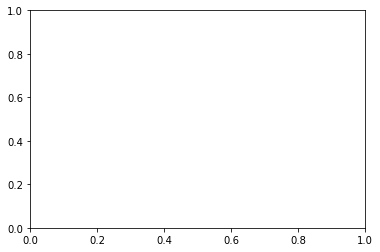

In [27]:
plot_scatter(d_graph["acc"], ns,"acc")

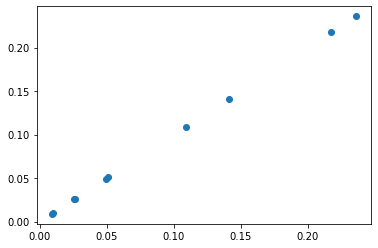

In [23]:
plot_scatter(data['acc'], data_rand['acc'],"acc")

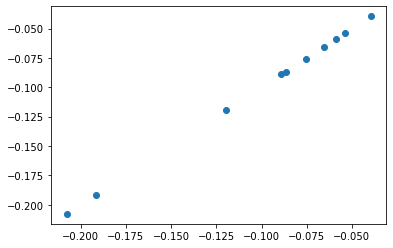

In [24]:
plot_scatter(data['assortativity'], data_rand['assortativity'],"assortativity")